In [31]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [32]:
# Data from: https://www.census.gov/quickfacts/fact/table/losangelescountycalifornia,CA/PST045219 & CDC
ca_demData = pd.read_csv("CA_CensusData.csv")
ca_suicData = pd.read_csv("ca_county_suicide_2015.csv")

In [33]:
ca_demData = ca_demData.rename(columns = {'County' : 'County_Names'})
ca_demData.head()

,County_Names,"Population estimates, July 1, 2019, (V2019)","Population estimates base, April 1, 2010, (V2019)","Population, percent change - April 1, 2010 (estimates base) to July 1, 2019, (V2019)","Population, Census, April 1, 2010","Persons under 5 years, percent","Persons under 18 years, percent","Persons 65 years and over, percent","Female persons, percent","White alone, percent",...,"All firms, 2012","Men-owned firms, 2012","Women-owned firms, 2012","Minority-owned firms, 2012","Nonminority-owned firms, 2012","Veteran-owned firms, 2012","Nonveteran-owned firms, 2012","Population per square mile, 2010","Land area in square miles, 2010",FIPS_County_Code
0,Alameda County,1671329.0,1510258.0,10.7,1510271.0,5.7,20.3,14.3,50.7,49.3,...,150564.0,76387.0,57305.0,75026.0,69300.0,10213.0,134032.0,2043.6,739.02,1
1,Alpine County,1129.0,1175.0,-3.9,1175.0,4.3,17.7,26.4,46.1,67.9,...,125.0,NaN,49.0,NaN,115.0,NaN,116.0,1.6,738.33,3
2,Amador County,39752.0,38091.0,4.4,38091.0,4.1,15.1,27.5,45.6,89.6,...,2807.0,1383.0,921.0,259.0,2453.0,258.0,2363.0,64.1,594.58,5
3,Butte County,219186.0,220005.0,-0.4,220000.0,5.5,20.3,18.4,50.5,85.7,...,16240.0,8370.0,5341.0,1858.0,13644.0,1766.0,13509.0,134.4,1636.46,7
4,Calaveras County,45905.0,45578.0,0.7,45578.0,4.5,17.1,28.0,50.2,91.0,...,3387.0,1861.0,1008.0,291.0,2983.0,392.0,2799.0,44.7,1020.01,9


In [34]:
ca_suicData.head()

,County_Names,Suicide_Counts,County_of_occurrence
0,Alameda County,138,1
1,Amador County,7,5
2,Butte County,39,7
3,Calaveras County,20,9
4,Colusa County,2,11


In [35]:
# Merge data
all_data = pd.merge(ca_demData, ca_suicData, on='County_Names', how='outer')
all_data.head()

,County_Names,"Population estimates, July 1, 2019, (V2019)","Population estimates base, April 1, 2010, (V2019)","Population, percent change - April 1, 2010 (estimates base) to July 1, 2019, (V2019)","Population, Census, April 1, 2010","Persons under 5 years, percent","Persons under 18 years, percent","Persons 65 years and over, percent","Female persons, percent","White alone, percent",...,"Women-owned firms, 2012","Minority-owned firms, 2012","Nonminority-owned firms, 2012","Veteran-owned firms, 2012","Nonveteran-owned firms, 2012","Population per square mile, 2010","Land area in square miles, 2010",FIPS_County_Code,Suicide_Counts,County_of_occurrence
0,Alameda County,1671329.0,1510258.0,10.7,1510271.0,5.7,20.3,14.3,50.7,49.3,...,57305.0,75026.0,69300.0,10213.0,134032.0,2043.6,739.02,1,138.0,1.0
1,Alpine County,1129.0,1175.0,-3.9,1175.0,4.3,17.7,26.4,46.1,67.9,...,49.0,NaN,115.0,NaN,116.0,1.6,738.33,3,NaN,NaN
2,Amador County,39752.0,38091.0,4.4,38091.0,4.1,15.1,27.5,45.6,89.6,...,921.0,259.0,2453.0,258.0,2363.0,64.1,594.58,5,7.0,5.0
3,Butte County,219186.0,220005.0,-0.4,220000.0,5.5,20.3,18.4,50.5,85.7,...,5341.0,1858.0,13644.0,1766.0,13509.0,134.4,1636.46,7,39.0,7.0
4,Calaveras County,45905.0,45578.0,0.7,45578.0,4.5,17.1,28.0,50.2,91.0,...,1008.0,291.0,2983.0,392.0,2799.0,44.7,1020.01,9,20.0,9.0


In [36]:
# Renaming some columns for use
all_data = all_data.rename(columns = {'Population, Census, April 1, 2010' : 'Population_2010', 'Persons per household, 2015-2019' : 'Avg_Household_Size', 'Veterans, 2015-2019' : 'Vet_Population', 'High school graduate or higher, percent of persons age 25 years+, 2015-2019' : 'HS_Grad_Percent', 'Bachelor\'s degree or higher, percent of persons age 25 years+, 2015-2019' : 'College_Grad_Percent', 'With a disability, under age 65 years, percent, 2015-2019' : 'Disability_percent', 'Persons  without health insurance, under age 65 years, percent' : 'Lacking_Health_Insurance_Percent', 'In civilian labor force, total, percent of population age 16 years+, 2015-2019' : 'Employed_16+_Percent', 'Total retail sales, 2012 ($1,000)' : 'Retail_Sales_by1000', 'Median household income (in 2019 dollars), 2015-2019' : 'Household_Income', 'Persons in poverty, percent' : 'Poverty_Percentage', 'All firms, 2012' : 'Firms_Num', 'Population per square mile, 2010' : 'Population_Density'})
all_data = all_data.interpolate(method = "linear")

In [37]:
x_data = all_data[['Avg_Household_Size', 'HS_Grad_Percent', 'College_Grad_Percent', 'Disability_percent', 'Vet_Population', 'Employed_16+_Percent', 'Lacking_Health_Insurance_Percent', 'Household_Income', 'Poverty_Percentage', 'Population_Density']]
y_data = all_data['Suicide_Counts']

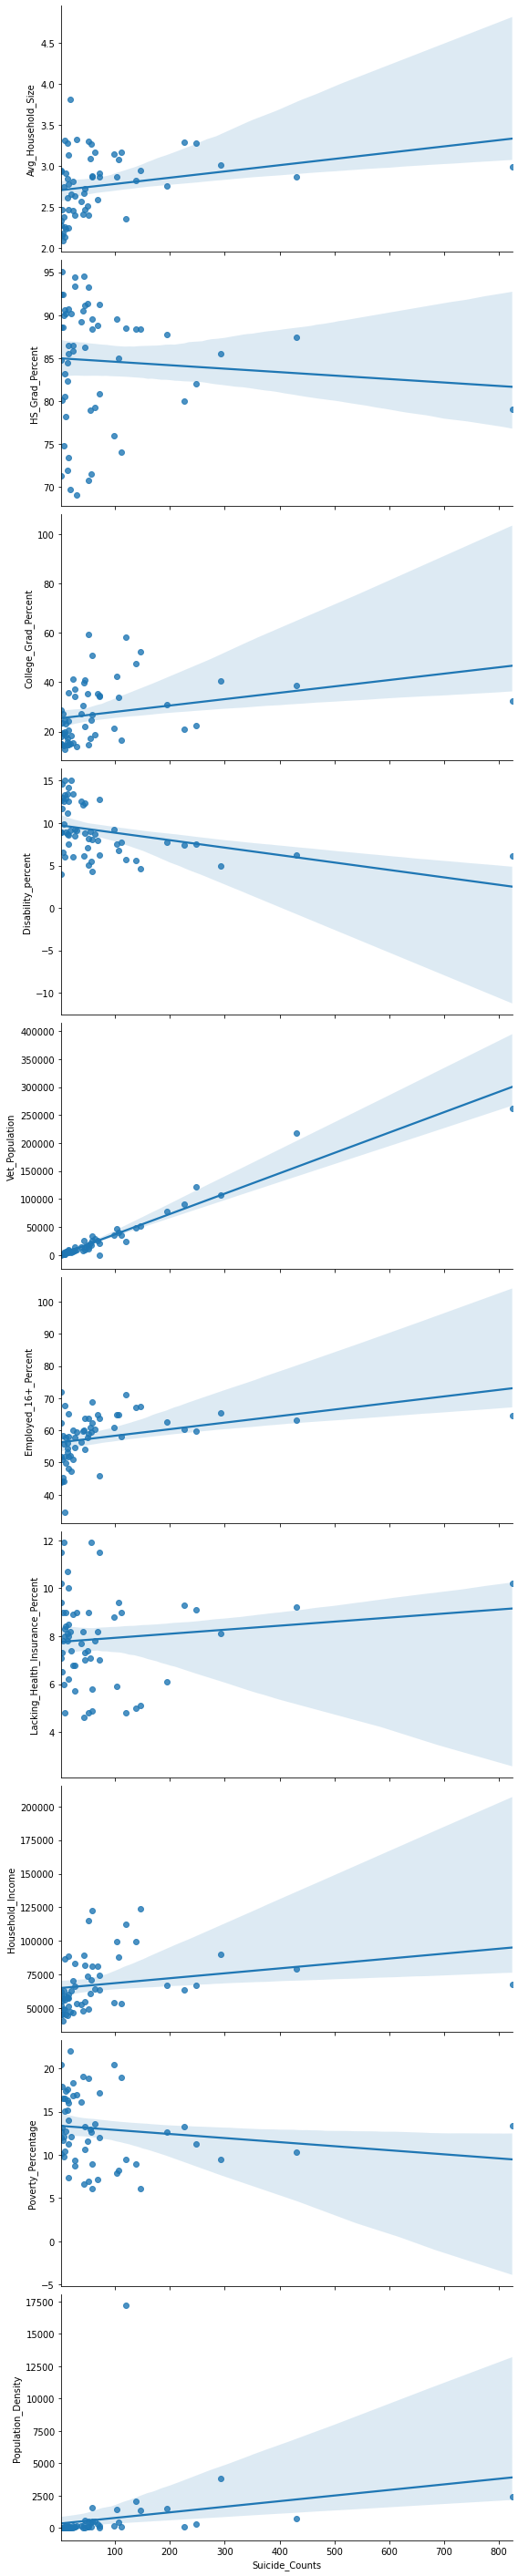

In [38]:
sns.pairplot(all_data, x_vars='Suicide_Counts', y_vars=['Avg_Household_Size', 'HS_Grad_Percent', 'College_Grad_Percent', 'Disability_percent', 'Vet_Population', 'Employed_16+_Percent', 'Lacking_Health_Insurance_Percent', 'Household_Income', 'Poverty_Percentage', 'Population_Density'], height=4, aspect=2, kind='reg')

In [39]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data)

In [40]:
# Create linear model and train it
LR = LinearRegression()
LR.fit(x_train, y_train)

LinearRegression()

In [42]:
# Use model to predict on test data
prediction = LR.predict(x_test)
for i in range(len(prediction)):
    print("Predicted Value: " + str(prediction[i]))
    print("Actual Value: " + str(y_test.iloc[i]) + "\n")

Predicted Value: 95.40128938575603
Actual Value: 99.0

Predicted Value: 13.952319913744333
Actual Value: 8.0

Predicted Value: 81.63437006144429
Actual Value: 58.0

Predicted Value: 559.5680098690012
Actual Value: 824.0

Predicted Value: 104.66523492653326
Actual Value: 107.0

Predicted Value: 62.764368064584716
Actual Value: 68.0

Predicted Value: 127.15961057619413
Actual Value: 138.0

Predicted Value: 19.587855515701932
Actual Value: 10.0

Predicted Value: 11.2844626661076
Actual Value: 16.0

Predicted Value: 123.82516334807198
Actual Value: 103.0

Predicted Value: 29.08767294284482
Actual Value: 16.0

Predicted Value: 265.4684305600132
Actual Value: 248.0

Predicted Value: 70.30692649922898
Actual Value: 63.0

Predicted Value: 40.445227378576334
Actual Value: 27.0

Predicted Value: 6.705994038221235
Actual Value: 7.0



In [43]:
LR.score(x_test, y_test)

0.8782140358733673